In [1]:
import sys

# Davide's epynet
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'scripts')

import network
import utils

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import wntr
import wntr.network.controls as controls
import csv
import pandas as pd
import yaml
import time
import datetime

## Davide C-Town epynet simulation

In [2]:
net = network.WaterDistributionNetwork("ctown.inp")
step = 300
duration = 3600
net.set_time_params(duration=duration, hydraulic_step=step) # duration=24h, hydstep=10min

In [3]:
status = [1.0, 0.0]
actuators_status_dict = {uid: status for uid in net.pumps.uid.append(net.valves.uid)}

In [4]:
net.run(interactive=True, status_dict=actuators_status_dict)
no_step_nodes_report = net.df_nodes_report
no_step_links_report = net.df_links_report

# Step-by-step simulation

In [5]:
net = network.WaterDistributionNetwork("ctown.inp")
step = 300
duration = 3600

net.set_time_params(duration=duration, hydraulic_step=step) # duration=24h, hydstep=10min

status = [1.0, 0.0]
actuators_status_dict = {uid: status for uid in net.pumps.uid.append(net.valves.uid)}

timestep = 1

simulation_time = 0 
sim_values = []

net.init_simulation(interactive=True)

# toDo: We would have to implement a way of having a master_time (iterations)
while timestep > 0:
    
    # get actuator_status from DB
    # create list of dictionaries = actuators_status_dict

    # /Andres: This is how it would look in the future/
    #net.update_actuators(actuators_status_dict)
    #timestep, network_state = net.simulate_step(simulation_time)
    
    timestep, network_state = net.simulate_step(simulation_time, actuators_status_dict)
        
    # update DB with network_state
    
    simulation_time = simulation_time + timestep
    
    print("current timestep: " + str(timestep))    
    print("current simulation_time: " + str(simulation_time))

current timestep: 300
current simulation_time: 300
current timestep: 300
current simulation_time: 600
current timestep: 116
current simulation_time: 716
current timestep: 184
current simulation_time: 900
current timestep: 300
current simulation_time: 1200
current timestep: 300
current simulation_time: 1500
current timestep: 216
current simulation_time: 1716
current timestep: 84
current simulation_time: 1800
current timestep: 300
current simulation_time: 2100
current timestep: 300
current simulation_time: 2400
current timestep: 220
current simulation_time: 2620
current timestep: 80
current simulation_time: 2700
current timestep: 230
current simulation_time: 2930
current timestep: 70
current simulation_time: 3000
current timestep: 80
current simulation_time: 3080
current timestep: 220
current simulation_time: 3300
current timestep: 106
current simulation_time: 3406
current timestep: 194
current simulation_time: 3600
current timestep: 0
current simulation_time: 3600


In [6]:
net.create_df_reports()
step_nodes_results = net.df_nodes_report
step_links_results = net.df_links_report

In [7]:
no_step_df_tanks = no_step_nodes_report.iloc[:, no_step_nodes_report.columns.get_level_values(2)=='pressure']['tanks'] 
step_df_tanks = step_nodes_results.iloc[:, step_nodes_results.columns.get_level_values(2)=='pressure']['tanks']

In [8]:
no_step_df_tanks

id,T1,T2,T3,T4,T5,T6,T7
properties,pressure,pressure,pressure,pressure,pressure,pressure,pressure
00:00:00,2.984864,0.519114,3.042810,2.521411,1.046840,5.221893,2.541409
00:05:00,2.974473,0.516468,3.108430,2.603224,1.117495,5.271249,2.662452
00:10:00,2.976744,0.499949,3.098403,2.610716,1.137751,5.259707,2.616928
00:11:56,2.970376,0.498414,3.138605,2.660786,1.181020,5.289979,2.691059
00:15:00,2.943131,0.533433,3.112675,2.683185,1.232061,5.260150,2.573297
00:20:00,2.932913,0.530658,3.178239,2.764754,1.302462,5.309473,2.694271
00:25:00,2.937176,0.499933,3.159570,2.778590,1.340046,5.287970,2.609517
00:28:36,2.934309,0.499220,3.177906,2.801370,1.359722,5.301779,2.643372
00:30:00,2.907164,0.534148,3.151976,2.823614,1.410591,5.271817,2.525791


In [9]:
step_df_tanks

id,T1,T2,T3,T4,T5,T6,T7
properties,pressure,pressure,pressure,pressure,pressure,pressure,pressure
00:00:00,2.984864,0.519114,3.042810,2.521411,1.046840,5.221893,2.541409
00:05:00,2.974473,0.516468,3.108430,2.603224,1.117495,5.271249,2.662452
00:10:00,2.976744,0.499949,3.098403,2.610716,1.137751,5.259707,2.616928
00:11:56,2.970376,0.498414,3.138605,2.660786,1.181020,5.289979,2.691059
00:15:00,2.943131,0.533433,3.112675,2.683185,1.232061,5.260150,2.573297
00:20:00,2.932913,0.530658,3.178239,2.764754,1.302462,5.309473,2.694271
00:25:00,2.937176,0.499933,3.159570,2.778590,1.340046,5.287970,2.609517
00:28:36,2.934309,0.499220,3.177906,2.801370,1.359722,5.301779,2.643372
00:30:00,2.907164,0.534148,3.151976,2.823614,1.410591,5.271817,2.525791


In [10]:
def do_subplot(series, variable_names, variable_type, legends, xlim=None, ylim=None):
    subplot_hspace = 0.6
    subplot_wspace = 0.1
    subplot_y_num = 2
    subplot_x_num = (len(variable_names)/subplot_y_num) + 1    
    i = 0

    
    for variable in variable_names:
        dd = plt.subplot(subplot_x_num,subplot_y_num,i+1)
        j = 0
        for serie in series:                        
            #serie[variable].plot(label=legends[j], ax=dd)        
            dd.plot(serie[variable][variable_type], label=legends[j])
            j = j + 1

        plt.title(variable_names[i])
        plt.xlabel('Iterations')
        plt.ylabel('tank level (m)')                       
        if xlim:
            plt.xlim(left=xlim[0], right=xlim[1])                    
        if ylim:
            plt.ylim(left=ylim[0], right=ylim[1])            
            
        plt.legend()
        plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
        plt.grid(True)
        
        i = i+1

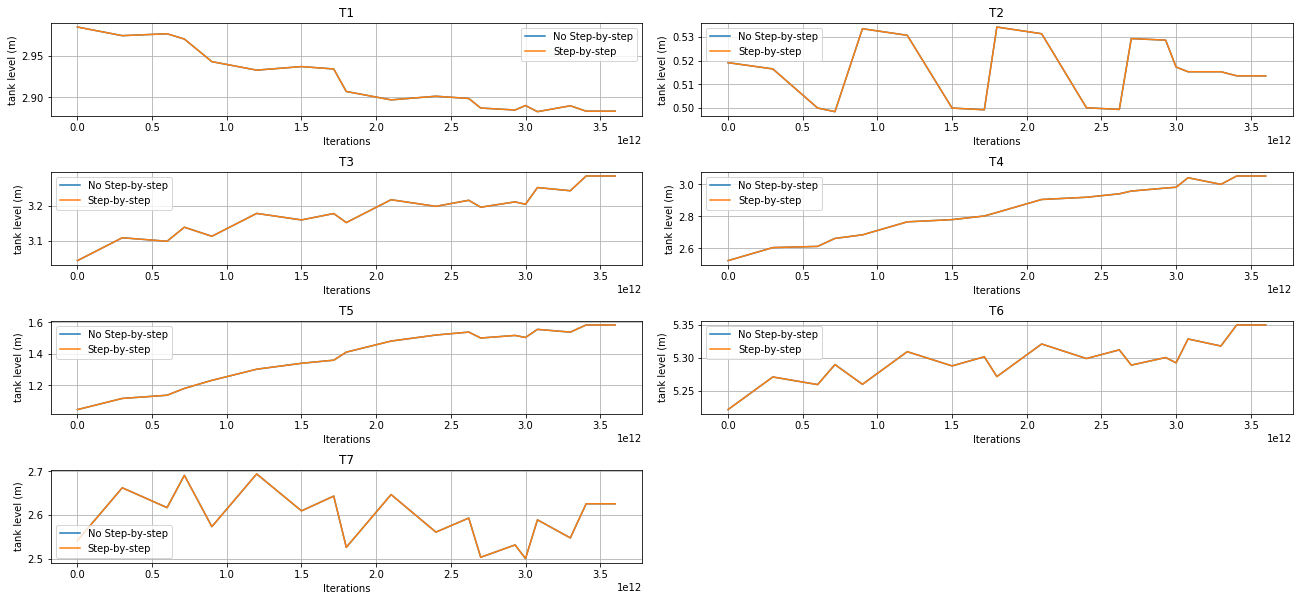

In [11]:
tanks = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] 
do_subplot([no_step_df_tanks, step_df_tanks], tanks, 'pressure',['No Step-by-step', 'Step-by-step'])